# Lab 4.1

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
print(customer_df.shape)
pd.set_option('display.max_columns', 24)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:
def std_col_names(data):
    '''function to standardize column_names'''  
    
    import re
    data_c = data.copy()
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(re.sub('([a-z])([A-Z])', r'\1_\2', i).replace(' ','_').lower())
    data_c.columns = cols 
    
    return data_c

customer_df = std_col_names(customer_df)

### 5. Change effective to date column to datetime format.

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format = '%m/%d/%y')

In [7]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Check NaN values per column.

In [8]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 7. Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.

In [9]:
def sep_num_cat(df):
    '''function that separates one dataframe into two: 
    one with numerical and another with categorical columns.
    When using this function, you have to store results in 2 variable'''
    n = df.select_dtypes(np.number)
    c = df.select_dtypes('object')
    return n,c

In [10]:
df_num,df_cat = sep_num_cat(customer_df)

In [11]:
print(customer_df.shape, df_num.shape, df_cat.shape)

(9134, 24) (9134, 8) (9134, 15)


effective to date is a datetime variable and cannot be handle by regression, as such, for now, will be left outside of numerical and categorical datasets

### 8. Drop any ID column.

In [12]:
df_cat = df_cat.drop(['customer'], axis =1)

In [13]:
df_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 9. Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [14]:
corr_m = df_num.corr()
corr_m

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


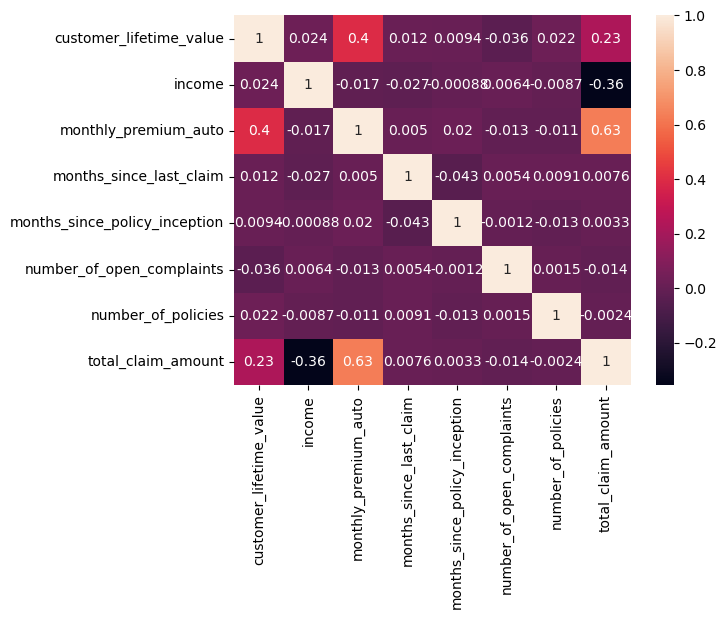

In [15]:
ax = sns.heatmap(corr_m, annot=True)

total_claim_amount : monthly_premium_auto
higher the monthly premium auto, higher the total claim amount. It makes sense.

### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 

To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [16]:
def sep_dis_con(df, c=36):
    '''function that separates one dataframe into two: 
    one with numerical and another with categorical columns.
    When using this function, you have to store results in 2 variable'''
    con = []
    dis = []
    for col in df:
        if len(df[col].unique()) > c:
            con.append(df[col])
        else:
            dis.append(df[col])
    con = pd.DataFrame(con).T
    dis = pd.DataFrame(dis).T    
    return con, dis

In [17]:
c, d = sep_dis_con(df_num)

In [18]:
print(c.shape, d.shape)

(9134, 5) (9134, 3)


### 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [19]:
def plot_barplot(df):
    '''Function to plot barplots for discrete dataframe:
    1 column, n rows (number of columns of dataframe) '''
    
    col_names = list(df)
    plt_size = len(col_names) #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    n = 0
    for i in col_names:
        sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), ax = ax[n])
        ax[n].set(xlabel = i, ylabel='Count')
        n += 1
    plt.show()

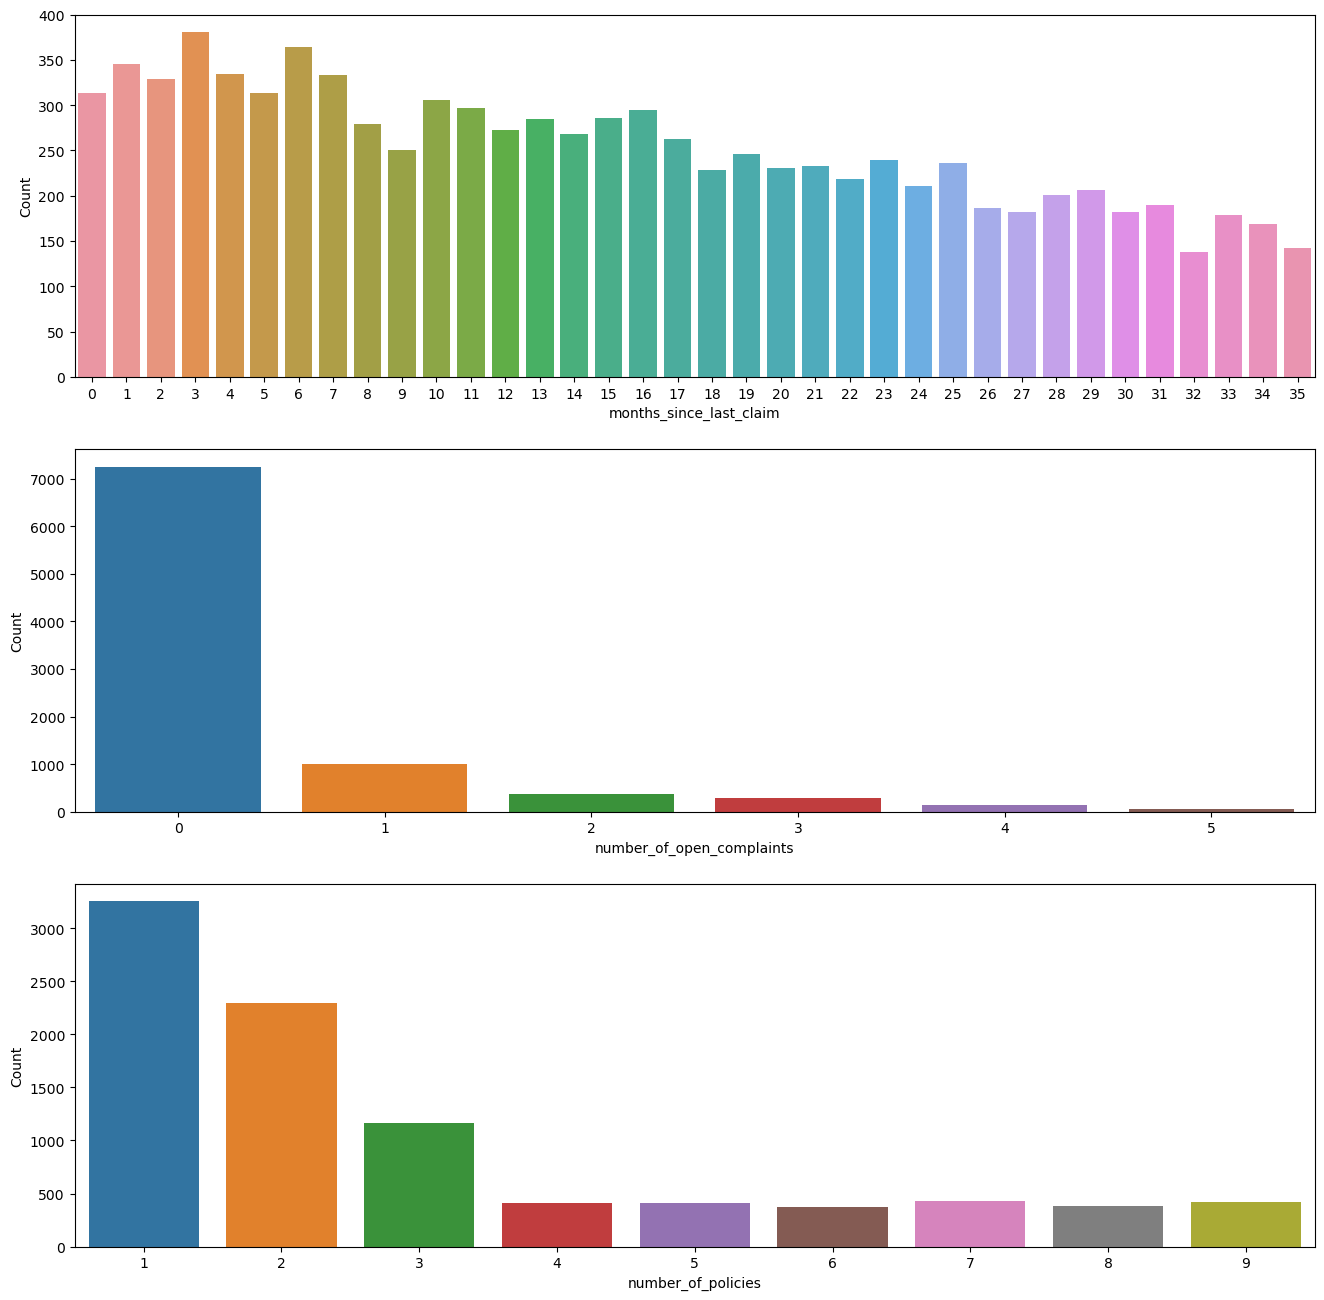

In [20]:
plot_barplot(d)

### 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def plot_histogram(df):
    
    import itertools
    
    col_names = list(df.select_dtypes(np.number))
    
    a = [0, 1, 2]
    c = list(itertools.permutations(a, 2)) #combinations generator for plot positions
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(3,3, figsize=(16,16))
    
    for i in col_names:
        sns.histplot(data = df[i], ax = ax[c[n]])
        n += 1
    plt.show()
    
As, in this, case, there are 5 continuous, numerical columns, there is no need to plot on a 2D subplot

In [21]:
def plot_histogram(df):
    '''Function to plot histograms for dataframe:
    1 column, n rows (number of columns of dataframe) '''
    
    col_names = list(df)
    plt_size = len(col_names)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.histplot(data = df[i], ax = ax[n])
        n += 1
    plt.show()

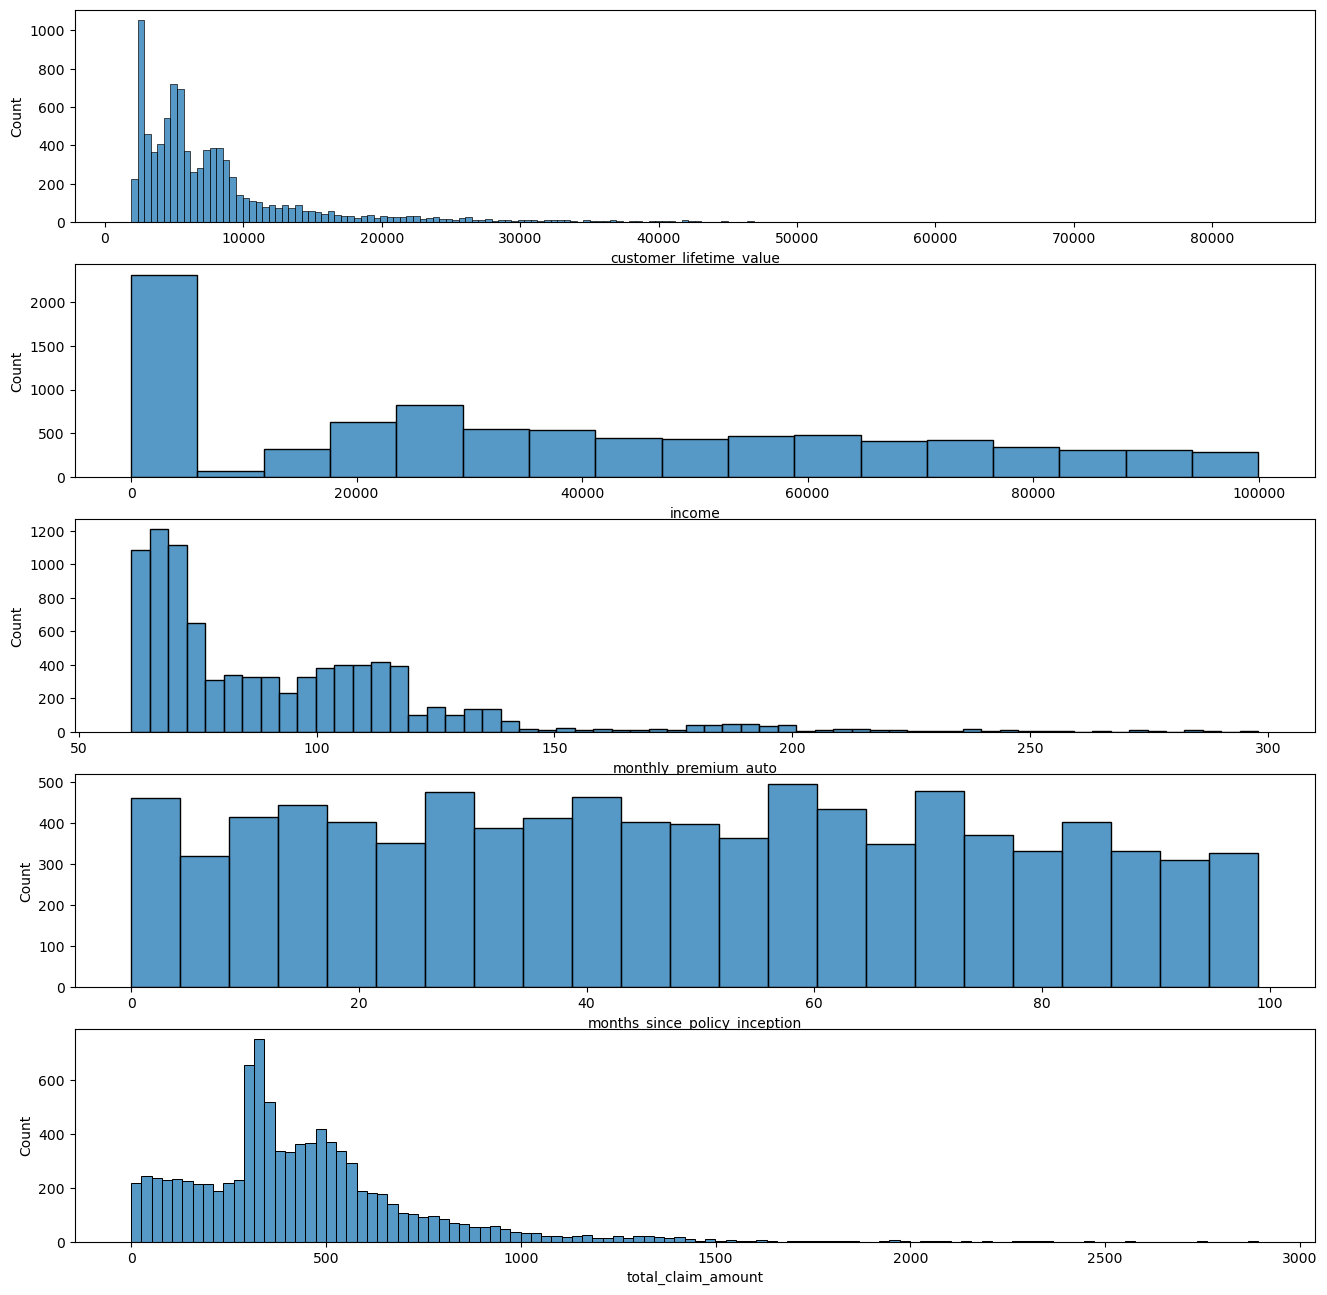

In [22]:
plot_histogram(c)

### 13. According to the previous histogram plots, do you think that you do will have to apply any transformation?

yes, there is skewed distribution

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

In [23]:
def plot_boxplot(df):
    '''Function to plot boxplots for dataframe:
    1 column, n rows (number of columns of dataframe) '''
        
    col_names = list(df)
    plt_size = len(col_names)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', ax = ax[n])
        n += 1
    plt.show()

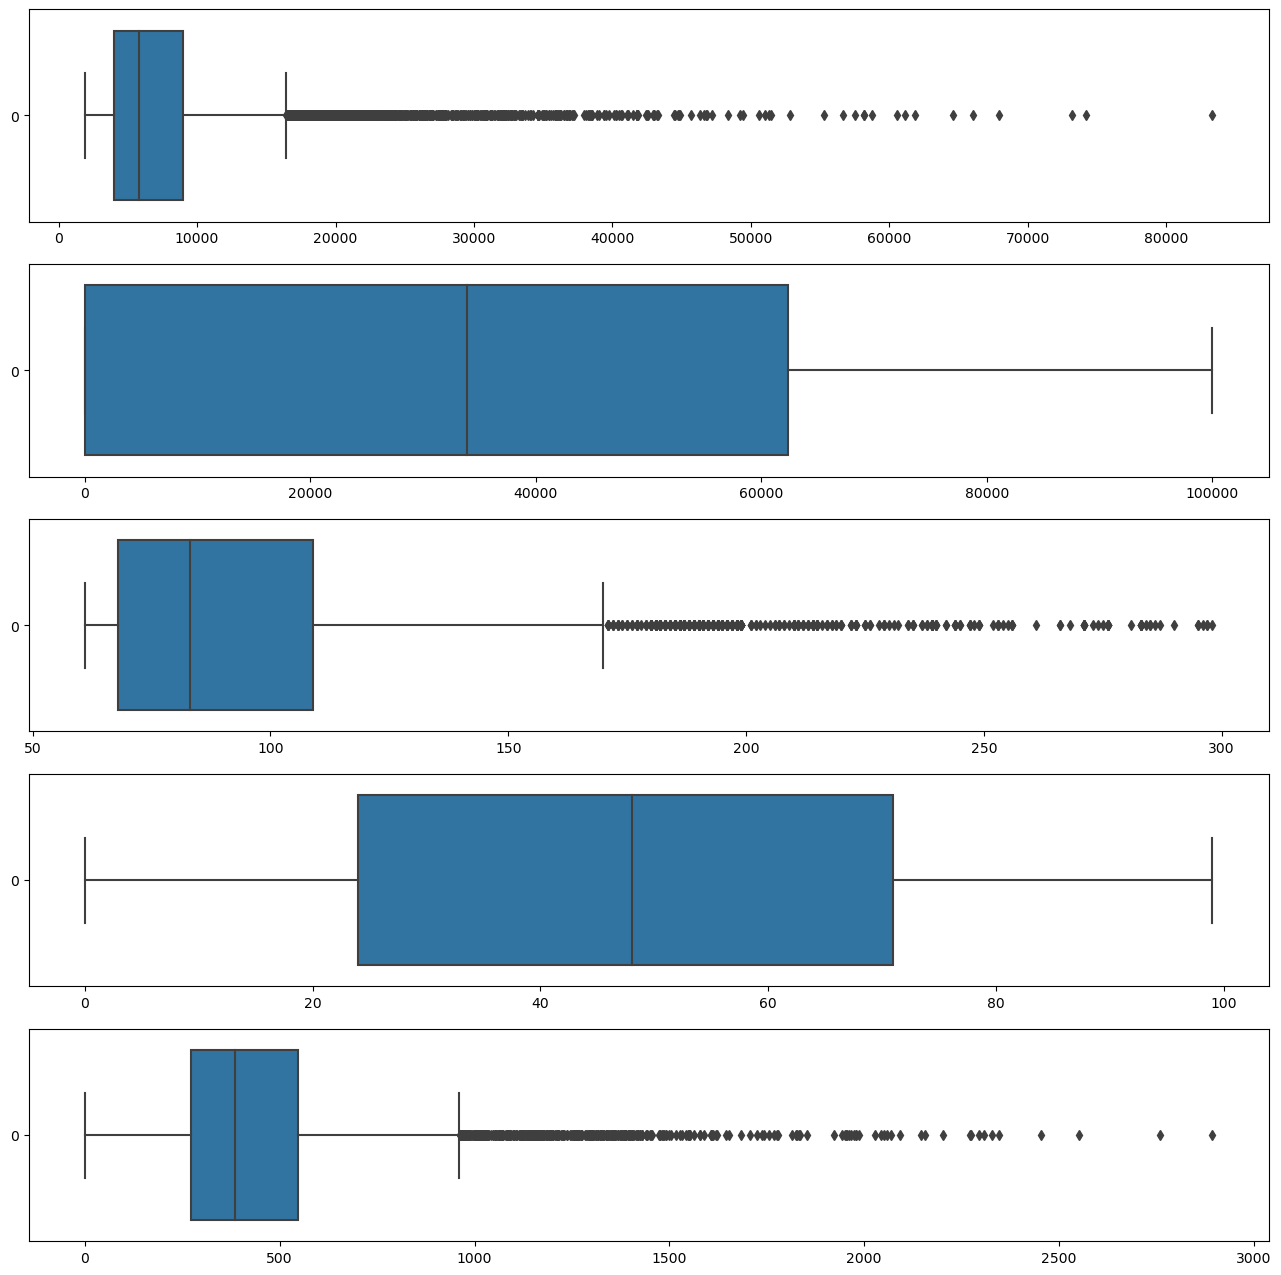

In [24]:
plot_boxplot(c)

# Lab | Cleaning categorical data

### 1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column.

Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed in the y axis instead of the x one.

In [25]:
def plot_countplot(df):
    '''Function to plot countplots for categorical dataframe:
    1 column, n rows (number of columns of dataframe) '''
    
    col_names = list(df)
    
    import math 
    
    plt_size = math.ceil(len(col_names)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    col_num = []
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
    
    fig, ax = plt.subplots(plt_size,2, figsize=(20,40))
    
    #orient = orientation
    
    for i in col_names:
        if len(df[i].unique()) >= 6:
            sns.countplot(data = df, y = i, ax = ax[row_num[n],col_num[n]])  
        else:
            sns.countplot(data = df, x = i, ax = ax[row_num[n],col_num[n]])    
        n += 1
                      
    plt.show()

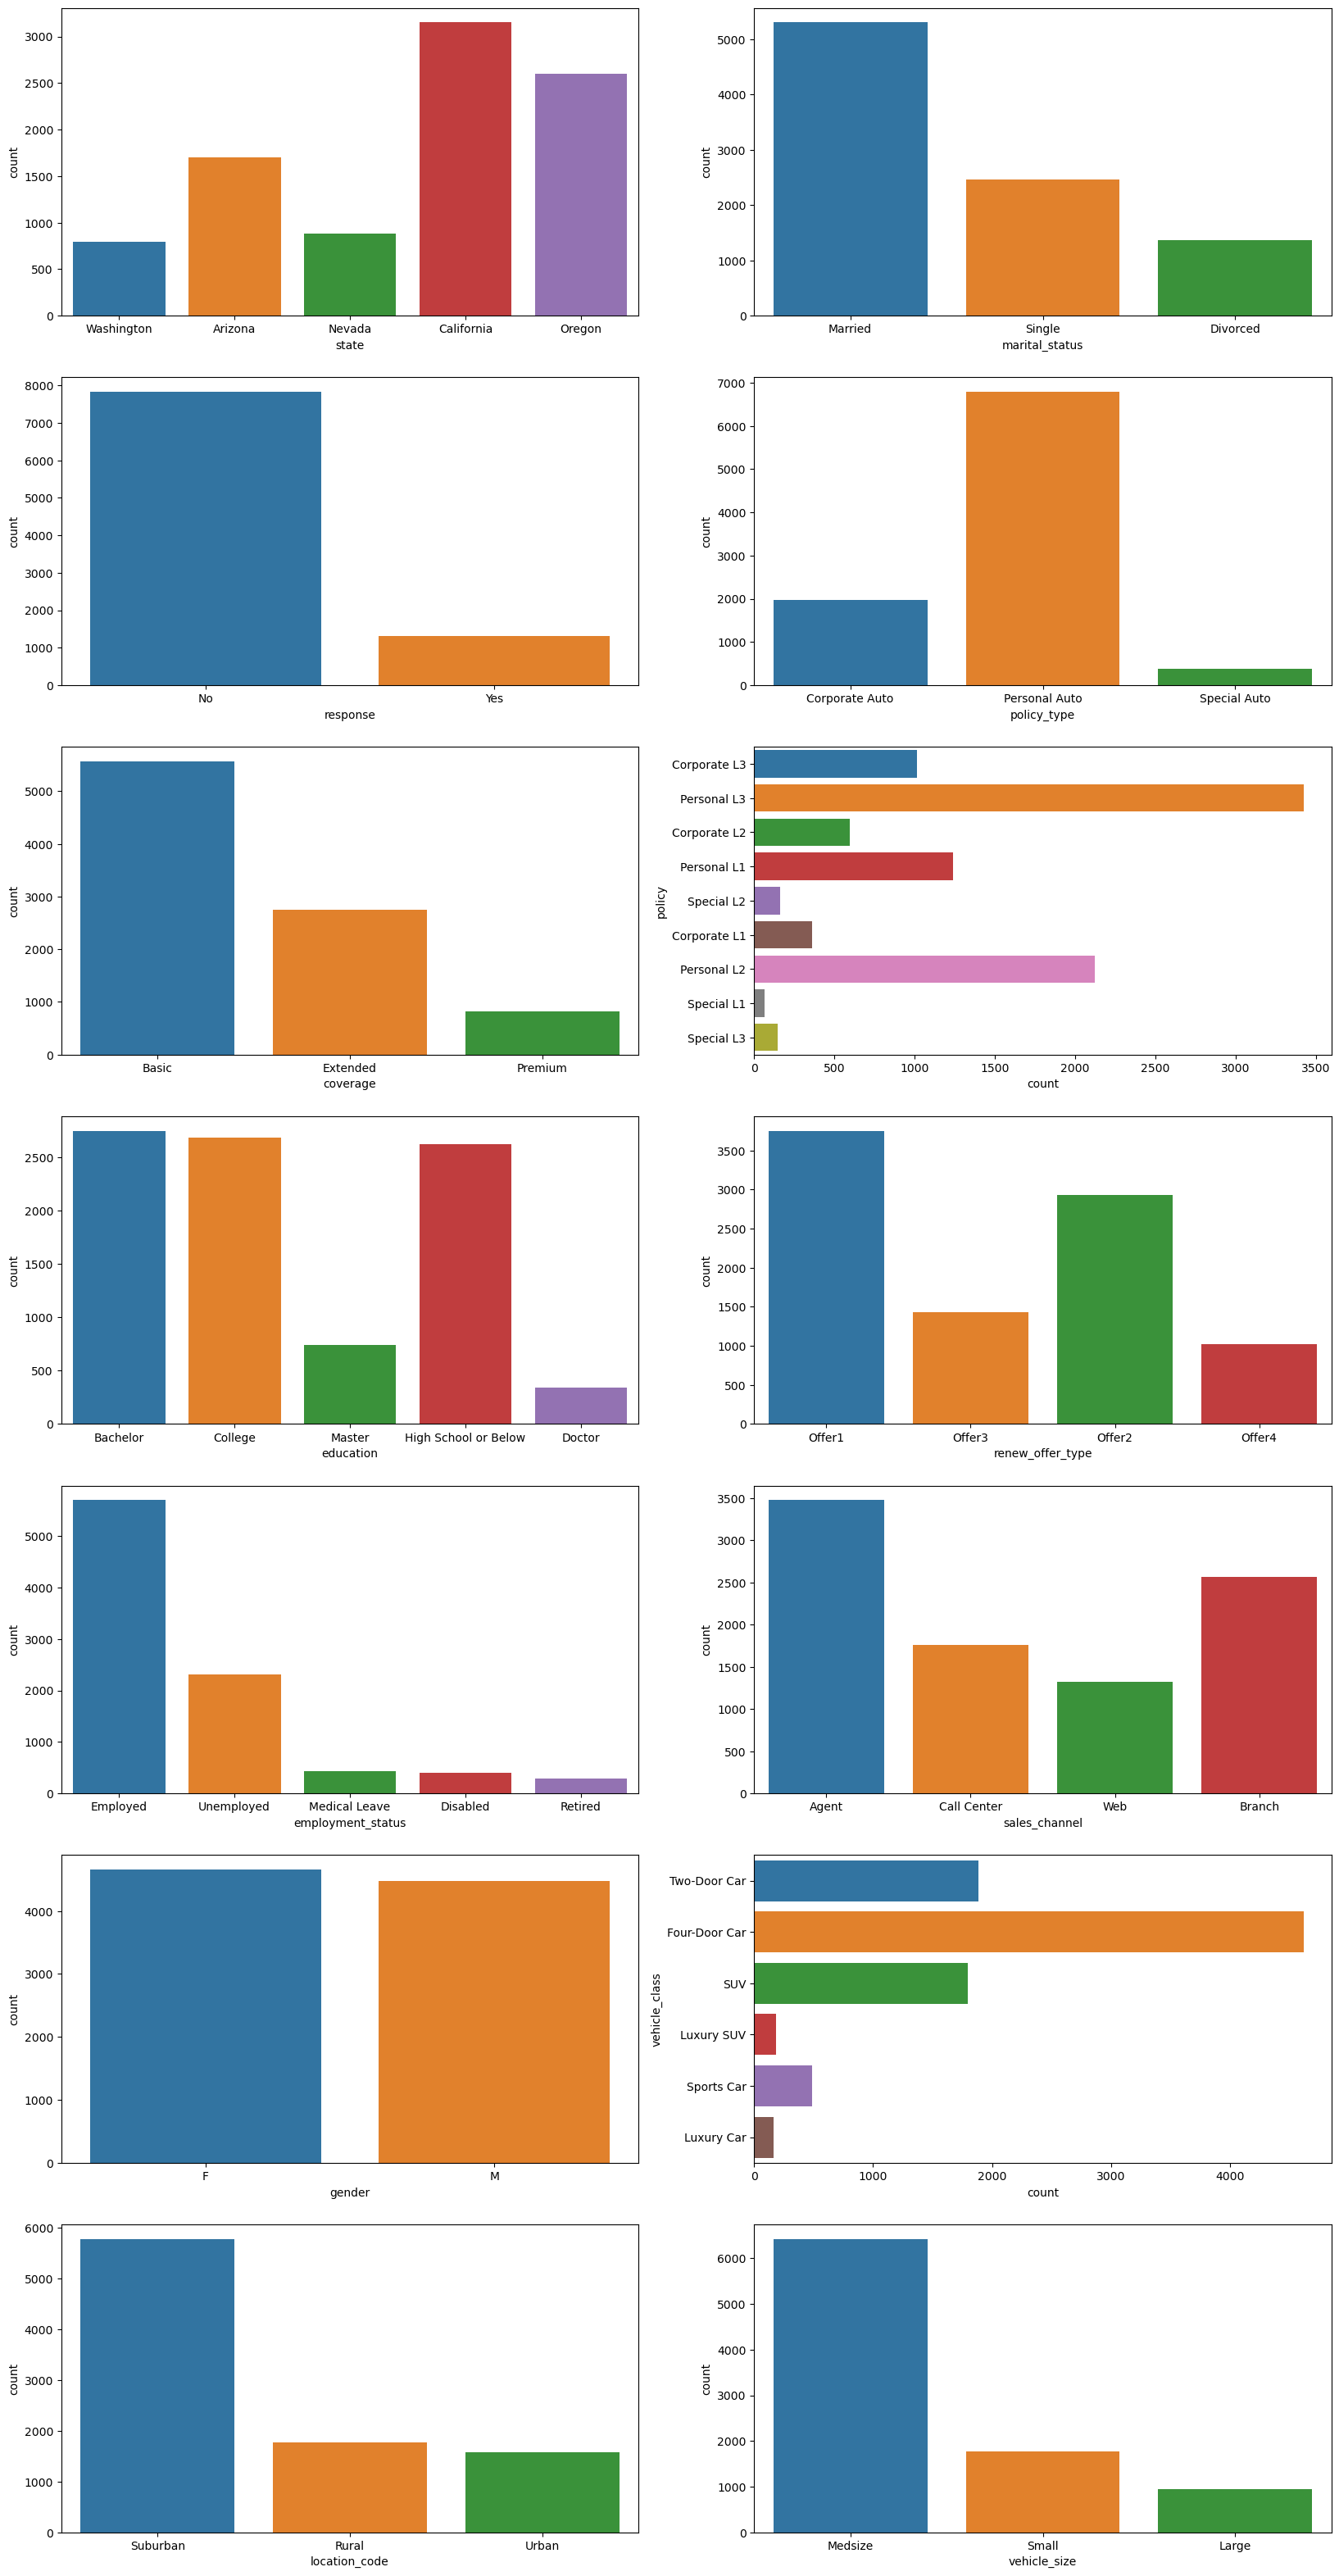

In [26]:
plot_countplot(df_cat)

### 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with a OneHotEncoder because we will increase a lot the number of columns in the dataframe.

Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [27]:
df_cat = df_cat.drop('policy_type', axis =1)

In [28]:
df_cat.policy = df_cat.policy.apply(lambda x: x[-2:])

In [29]:
df_cat.shape

(9134, 13)

### 3. Time dependency analysis.

Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

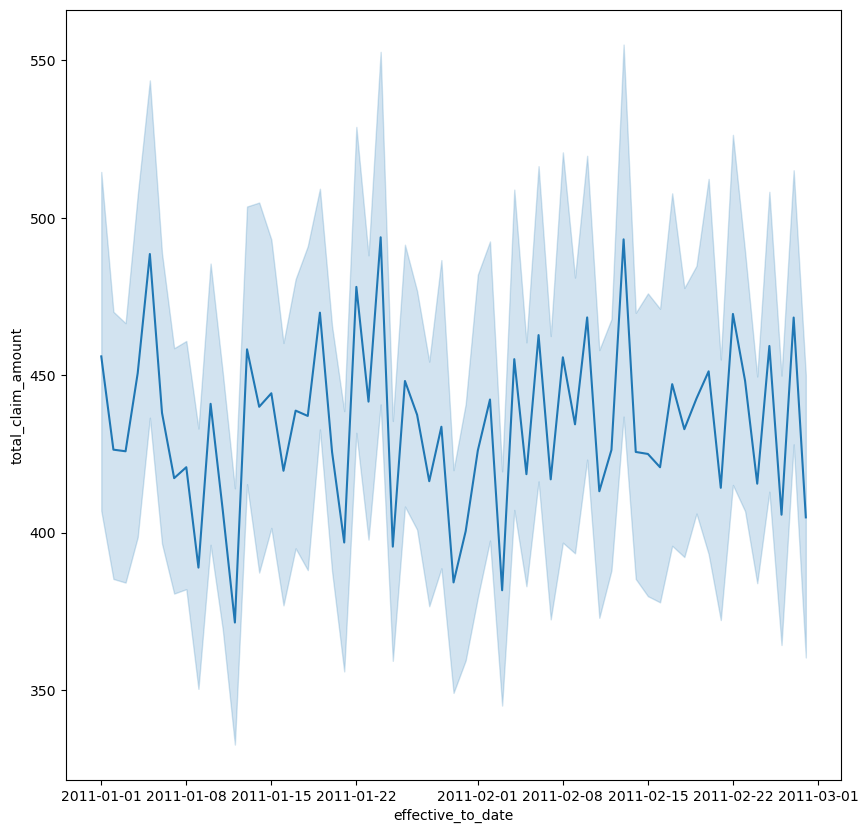

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = customer_df, x = 'effective_to_date', y = 'total_claim_amount', ax=ax)

### 4. To continue the analysis define an empty pandas DataFrame

, and add the following new columns: \
    day with the day number of effective_to_date \
    day_name with the day NAME of effective_to_date\
    week with the week of effective_to_date\
    month with the month NAME of effective_to_date\
    total_claim_amount with total_claim_amount

In [31]:
customer_df_date = pd.DataFrame()

In [33]:
def import_time(df_col):
    df_date = pd.DataFrame()
    df_date['day'] = df_col.dt.dayofyear
    df_date['day_name'] = df_col.dt.day_name()
    df_date['week'] = df_col.dt.isocalendar().week
    df_date['month'] = df_col.dt.month_name()
    return df_date

In [34]:
customer_df_date = import_time(customer_df['effective_to_date'])

In [35]:
customer_df_date['total_claim_amount'] = customer_df['total_claim_amount']

In [36]:
customer_df_date.head()

,day,day_name,week,month,total_claim_amount
0,55,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,50,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,34,Thursday,5,February,138.130879


### 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [37]:
day_tca_sum = customer_df_date.groupby('day_name').agg({'total_claim_amount':
                                          'sum'}).round(2).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])
day_tca_sum

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


### 6. Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week?

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

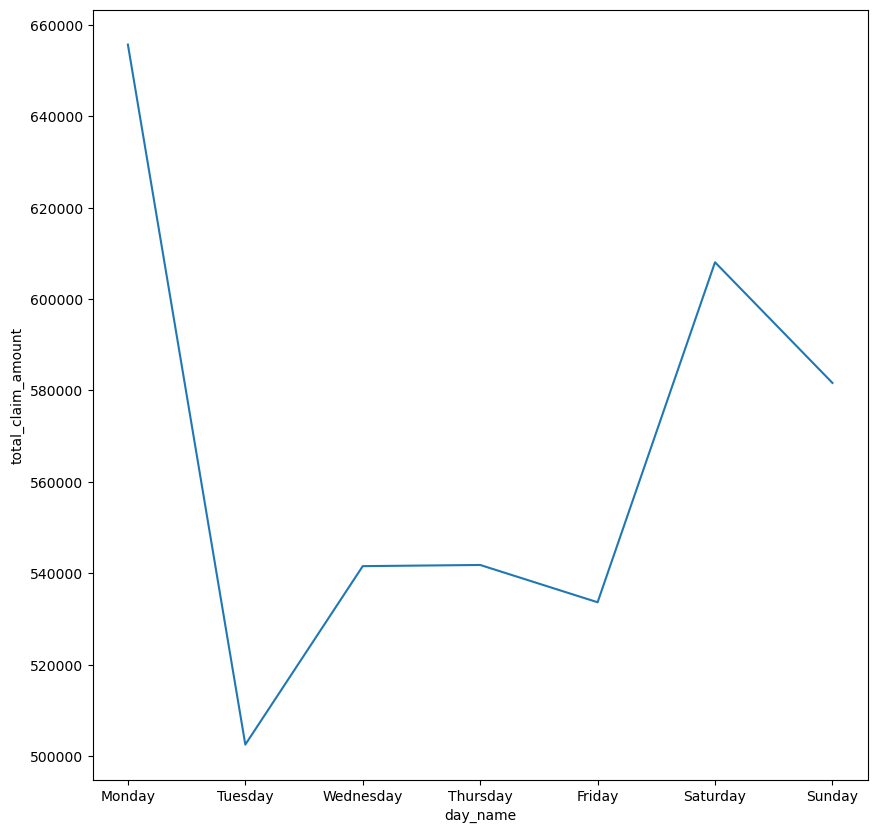

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = day_tca_sum, x = 'day_name', y = 'total_claim_amount', ax=ax)

monday > saturday > sunday > thursday ~ wednesday > tuesday

### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [39]:
customer_df_date.groupby('day_name').agg({'total_claim_amount':
                                          'count'}).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


### 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [40]:
day_tca_median = customer_df_date.groupby('day_name').agg({'total_claim_amount':
                                          'median'}).sort_values(by='total_claim_amount').reset_index()
day_tca_median

,day_name,total_claim_amount
0,Friday,371.803029
1,Tuesday,378.490829
2,Saturday,379.200000
3,Sunday,383.721164
4,Monday,385.735705
5,Wednesday,392.235698
6,Thursday,395.328407


### 9. Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

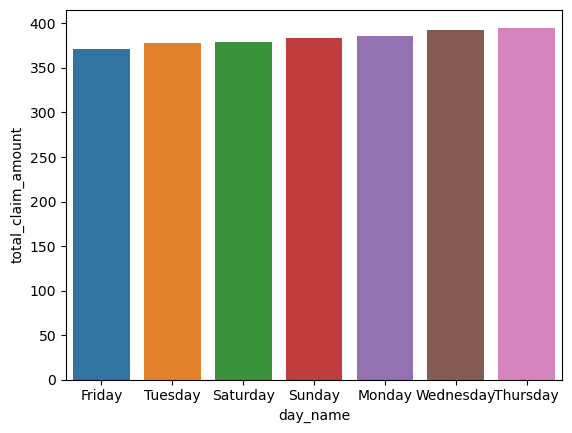

In [41]:
sns.barplot(data = day_tca_median, x='day_name', y='total_claim_amount')

### 10. What do you can conclude from this analysis?

As the counts of totally_claim_amout are very similar between all weekdays, as well as the media, I conclude that 50% of the lowest amounts are more or less constant during the week, and 50% highest amounts are the ones responsible for the variations in the total sum of totally_claim_amount within weekdays.

### 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [42]:
customer_df_date.groupby('month').agg({'total_claim_amount':
                                          'sum'}).round(2).reindex(index={'January','February'})

,total_claim_amount
month,
January,2117142.86
February,1847824.19


### 12. Can you do a monthly analysis given the output of the previous series? Why?

No, because we only have data from january and february

### 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [44]:
def remove_outliers(df):
    dfc = df.copy()
    
    col_names = list(df.select_dtypes(np.number))
    outlier = [] #list to store outlier threshold before starting to drop rows
    n = 0 #counter for for loop
    
    for i in col_names: outlier.append (3*dfc[i].std())
        
    for i in col_names:
        dfc = dfc[ dfc[i] <= outlier[n] ]
        n += 1
        
    return dfc

### 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [45]:
continuous_clean_df = remove_outliers(c)

### 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df. 

As after removing outliers the continuous_cleaned dataframe will have less rows (when you concat the individual dataframes using using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [46]:
data = pd.concat([df_cat,customer_df_date['day_name'],d,continuous_clean_df], axis=1).dropna()

### 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [70]:
data.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,Washington,0,1,Bachelor,3,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,Thursday,32,0,1,2763.519279,56274.0,69.0,5.0,384.811147
4,Washington,0,1,Bachelor,3,0,1,Single,L1,Offer1,Agent,Four-Door Car,2,Thursday,12,0,1,2813.692575,43836.0,73.0,44.0,138.130879
6,Oregon,1,1,College,3,1,2,Married,L3,Offer1,Agent,Four-Door Car,2,Thursday,0,0,9,5380.898636,55350.0,67.0,13.0,321.600000
7,Arizona,0,3,Graduate,1,0,3,Single,L3,Offer1,Agent,Four-Door Car,2,Tuesday,0,0,4,7216.100311,0.0,101.0,68.0,363.029680
9,Oregon,0,2,College,3,1,3,Married,L2,Offer2,Branch,Four-Door Car,2,Thursday,17,0,8,7388.178085,28812.0,93.0,7.0,425.527834


no need to use anything in this case, could use this command \
\
data = data[['state', 'response', 'coverage', 'education', 'employment_status','gender', 'location_code', 'marital_status', 'policy',
'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
'day_name', 'months_since_last_claim', 'number_of_open_complaints',
'number_of_policies', 'customer_lifetime_value', 'income',
'monthly_premium_auto', 'months_since_policy_inception',
'total_claim_amount']]

### 17. Turn the response column values into (Yes=1/No=0).

In [48]:
data.response = data.response.apply(lambda x: 1 if x in 'Yes' else 0)

In [49]:
data.response.value_counts()

0    4257
1     696
Name: response, dtype: int64

### 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [50]:
data.education = data.education.apply(lambda x: 'Graduate' if x in ('Master','Doctor') else x)

In [51]:
data.education.value_counts()

Bachelor                1482
College                 1466
High School or Below    1397
Graduate                 608
Name: education, dtype: int64

### 19. Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [52]:
data.employment_status = data.employment_status.apply(lambda x: 'Inactive' if x in ('Medical Leave','Disabled','Retired') else x)

In [53]:
data.employment_status.value_counts()

Employed      3026
Unemployed    1273
Inactive       654
Name: employment_status, dtype: int64

### 20. Deal with column Gender turning the values into (1/0).

In [54]:
data.gender.value_counts()

F    2523
M    2430
Name: gender, dtype: int64

In [55]:
data.gender = data.gender.apply(lambda x: 1 if x in ('F') else 0)

In [56]:
data.gender.value_counts()

1    2523
0    2430
Name: gender, dtype: int64

### 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [57]:
data.vehicle_class = data.vehicle_class.apply(lambda x: 'Luxury' if x in ('Sports Car','Luxury SUV','Luxury Car') else x)

In [58]:
data.vehicle_class.value_counts()

Four-Door Car    3363
Two-Door Car     1387
SUV               159
Luxury             44
Name: vehicle_class, dtype: int64

### 22. Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [59]:
data.coverage = data.coverage.apply(lambda x: 3 if x in 'Premium' else ( 2 if x in 'Extended' else 1))

In [60]:
data.coverage.value_counts()

1    3384
2    1488
3      81
Name: coverage, dtype: int64

### 23. Encode employmentstatus: "Employed" > "Inactive" > "Unemployed".

In [61]:
data.employment_status = data.employment_status.apply(lambda x: 3 if x in 'Employed' else ( 2 if x in 'Inactive' else 1))
data.employment_status.value_counts()

3    3026
1    1273
2     654
Name: employment_status, dtype: int64

### 24. Encode location code: "Urban" > "Suburban" > "Rural".

In [62]:
data.location_code = data.location_code.apply(lambda x: 3 if x in 'Urban' else ( 2 if x in 'Suburban' else 1))
data.location_code.value_counts()

2    3100
1     970
3     883
Name: location_code, dtype: int64

### 25. Encode vehicle size: "Large" > "Medsize" > "Small".

In [63]:
data.vehicle_size = data.vehicle_size.apply(lambda x: 3 if x in 'Large' else ( 2 if x in 'Medsize' else 1))
data.vehicle_size.value_counts()

2    3458
1     966
3     529
Name: vehicle_size, dtype: int64

### 26. Get a dataframe with the categorical nominal columns

In [71]:
data_nominal = data[['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']]

In [72]:
data_nominal.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday
6,Oregon,College,Married,L3,Offer1,Agent,Four-Door Car,Thursday
7,Arizona,Graduate,Single,L3,Offer1,Agent,Four-Door Car,Tuesday
9,Oregon,College,Married,L2,Offer2,Branch,Four-Door Car,Thursday


### 27. Create a list named levels which has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

In [74]:
nominal_columns = ['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']
levels = []
for i in nominal_columns: levels.append(list(data[i].unique()))
levels

[['Washington', 'Oregon', 'Arizona', 'California', 'Nevada'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L1', 'L2'],
 ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
 ['Agent', 'Branch', 'Call Center', 'Web'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Tuesday',
  'Monday',
  'Sunday',
  'Wednesday',
  'Friday',
  'Saturday']]

### 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = levels)

data_enc = encoder.fit_transform(data_nominal).toarray()

data_enc = pd.DataFrame(data_enc, columns = encoder.get_feature_names_out())

In [69]:
data_enc.head()

,state_Oregon,state_Arizona,state_California,state_Nevada,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L1,policy_L2,renew_offer_type_Offer2,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Tuesday,day_name_Monday,day_name_Sunday,day_name_Wednesday,day_name_Friday,day_name_Saturday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
